正在安装必要的依赖...
第 1 代 | 平均奖励: -498.86 | 最高奖励: -49.17


<ipython-input-3-1328000094>:157: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')
<ipython-input-3-1328000094>:157: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')
<ipython-input-3-1328000094>:157: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')
<ipython-input-3-1328000094>:157: UserWarning: Glyph 26500 (\N{CJK UNIFIED IDEOGRAPH-6784}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')
<ipython-input-3-1328000094>:157: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')
<ipython-input-3-1328000094>:157: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Sans.
  plt.savefig(filen

第 2 代 | 平均奖励: -571.91 | 最高奖励: -20.26
第 3 代 | 平均奖励: -491.37 | 最高奖励: -74.69
第 4 代 | 平均奖励: -466.45 | 最高奖励: -34.50
第 5 代 | 平均奖励: -484.55 | 最高奖励: -70.78
第 6 代 | 平均奖励: -467.74 | 最高奖励: -100.10
第 7 代 | 平均奖励: -408.38 | 最高奖励: -110.36
第 8 代 | 平均奖励: -405.01 | 最高奖励: -85.49
第 9 代 | 平均奖励: -402.91 | 最高奖励: -96.76
第 10 代 | 平均奖励: -368.27 | 最高奖励: -63.71
第 11 代 | 平均奖励: -496.26 | 最高奖励: -136.14
第 12 代 | 平均奖励: -446.52 | 最高奖励: -90.97
第 13 代 | 平均奖励: -336.98 | 最高奖励: -87.62
第 14 代 | 平均奖励: -276.36 | 最高奖励: -87.66
第 15 代 | 平均奖励: -325.11 | 最高奖励: -96.29
第 16 代 | 平均奖励: -397.05 | 最高奖励: -69.45
第 17 代 | 平均奖励: -355.47 | 最高奖励: -88.23
第 18 代 | 平均奖励: -416.82 | 最高奖励: 68.92
第 19 代 | 平均奖励: -424.62 | 最高奖励: -58.96
第 20 代 | 平均奖励: -375.01 | 最高奖励: -60.11
第 21 代 | 平均奖励: -427.30 | 最高奖励: -84.79
第 22 代 | 平均奖励: -414.14 | 最高奖励: -33.62
第 23 代 | 平均奖励: -429.61 | 最高奖励: -93.52
第 24 代 | 平均奖励: -357.84 | 最高奖励: -76.11
第 25 代 | 平均奖励: -397.58 | 最高奖励: -45.40
第 26 代 | 平均奖励: -301.83 | 最高奖励: 23.39
第 27 代 | 平均奖励: -336.83 | 最高奖励: 116.14
第 28 代 | 平均奖励: -436

<ipython-input-3-1328000094>:302: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.savefig("training_rewards.png", bbox_inches='tight')
<ipython-input-3-1328000094>:302: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.savefig("training_rewards.png", bbox_inches='tight')
<ipython-input-3-1328000094>:302: UserWarning: Glyph 22870 (\N{CJK UNIFIED IDEOGRAPH-5956}) missing from font(s) DejaVu Sans.
  plt.savefig("training_rewards.png", bbox_inches='tight')
<ipython-input-3-1328000094>:302: UserWarning: Glyph 21169 (\N{CJK UNIFIED IDEOGRAPH-52B1}) missing from font(s) DejaVu Sans.
  plt.savefig("training_rewards.png", bbox_inches='tight')
<ipython-input-3-1328000094>:302: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.savefig("training_rewards.png", bbox_inches='tight')
<ipython-input-3-1328000094>:302: UserWarning: Glyph 32451 (\N{CJK UNIFIED 

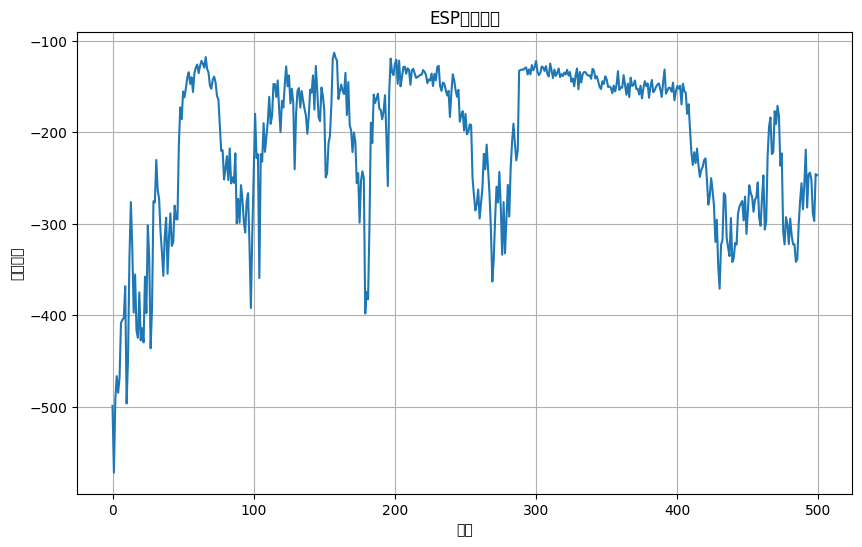

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import random
from copy import deepcopy
import networkx as nx
from matplotlib.lines import Line2D
import imageio
from PIL import Image, ImageDraw, ImageFont

# 超参数设置 (已调整)
INPUT_SIZE = 8        # 输入层神经元数(LunarLander观测空间维度)
HIDDEN_SIZE = 32      # 隐藏层神经元数(从16增加到32)
OUTPUT_SIZE = 4       # 输出层神经元数(LunarLander动作空间维度)
POP_SIZE = 50         # 种群大小
GENERATIONS = 500     # 进化代数(从1000减少到500，平衡训练时间)
EPISODES_PER_NETWORK = 3  # 每个网络评估的回合数
MUTATION_RATE = 0.2   # 变异率
ELITE_RATIO = 0.2     # 精英比例
OUTPUT_MUTATION_STRENGTH = 0.02  # 输出权重变异强度

# 可视化颜色
INPUT_COLOR = '#FF9999'
HIDDEN_COLOR = '#99CCFF'
OUTPUT_COLOR = '#99FF99'
POSITIVE_EDGE_COLOR = '#FF6666'
NEGATIVE_EDGE_COLOR = '#6666FF'

def relu(x):
    """ReLU激活函数"""
    return np.maximum(0, x)

def softmax(x):
    """Softmax函数"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

class NeuronGenome:
    """神经元基因组"""
    def __init__(self, input_size):
        # 初始化权重和偏置(使用更小的初始值)
        self.weights = np.random.randn(input_size) * 0.1
        self.bias = np.random.randn() * 0.1

    def mutate(self):
        """变异操作"""
        if np.random.rand() < MUTATION_RATE:
            self.weights += np.random.randn(*self.weights.shape) * 0.05  # 减小变异幅度
            self.bias += np.random.randn() * 0.05

    def copy(self):
        """创建副本"""
        copied = NeuronGenome(len(self.weights))
        copied.weights = np.copy(self.weights)
        copied.bias = self.bias
        return copied

class ESPNetwork:
    """ESP网络"""
    def __init__(self, hidden_neurons):
        self.hidden_neurons = hidden_neurons
        # 输出层权重矩阵形状: (隐藏层大小, 输出层大小)
        self.output_weights = np.random.randn(len(hidden_neurons), OUTPUT_SIZE) * 0.1

    def forward(self, x):
        """前向传播"""
        # 隐藏层计算
        h = np.array([np.dot(n.weights, x) + n.bias for n in self.hidden_neurons])
        h = relu(h)
        # 输出层计算
        return softmax(np.dot(h, self.output_weights))

def evaluate(network, env_name="LunarLander-v3", render=False):
    """评估网络性能"""
    env = gym.make(env_name, render_mode="rgb_array" if render else None)
    total_reward = 0

    for _ in range(EPISODES_PER_NETWORK):
        obs, _ = env.reset()
        done = False

        while not done:
            action_probs = network.forward(obs)
            action = np.argmax(action_probs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward

    env.close()
    return total_reward / EPISODES_PER_NETWORK

def visualize_network(hidden_neurons, output_weights, generation, filename=None):
    """可视化网络结构"""
    plt.figure(figsize=(15, 10))
    G = nx.DiGraph()

    # 添加节点
    for i in range(INPUT_SIZE):
        G.add_node(f'I{i}', layer=0, color=INPUT_COLOR)
    for i in range(HIDDEN_SIZE):
        G.add_node(f'H{i}', layer=1, color=HIDDEN_COLOR)
    for i in range(OUTPUT_SIZE):
        G.add_node(f'O{i}', layer=2, color=OUTPUT_COLOR)

    # 添加边
    for hi in range(HIDDEN_SIZE):
        neuron = hidden_neurons[hi]
        for ii in range(INPUT_SIZE):
            weight = neuron.weights[ii]
            color = POSITIVE_EDGE_COLOR if weight > 0 else NEGATIVE_EDGE_COLOR
            G.add_edge(f'I{ii}', f'H{hi}', weight=weight, color=color)

    for hi in range(HIDDEN_SIZE):
        for oi in range(OUTPUT_SIZE):
            weight = output_weights[hi][oi]
            color = POSITIVE_EDGE_COLOR if weight > 0 else NEGATIVE_EDGE_COLOR
            G.add_edge(f'H{hi}', f'O{oi}', weight=weight, color=color)

    # 节点布局
    pos = {}
    layer_width = 5
    input_y = np.linspace(0, layer_width, INPUT_SIZE)
    hidden_y = np.linspace(0, layer_width, HIDDEN_SIZE)
    output_y = np.linspace(0, layer_width, OUTPUT_SIZE)

    for i in range(INPUT_SIZE):
        pos[f'I{i}'] = (0, input_y[i])
    for i in range(HIDDEN_SIZE):
        pos[f'H{i}'] = (1, hidden_y[i])
    for i in range(OUTPUT_SIZE):
        pos[f'O{i}'] = (2, output_y[i])

    # 绘制
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]
    edge_colors = [G.edges[e]['color'] for e in G.edges()]
    edge_widths = [abs(G.edges[e]['weight']) * 2 for e in G.edges()]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, arrows=False)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # 添加图例
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='输入层', markerfacecolor=INPUT_COLOR, markersize=10),
        Line2D([0], [0], marker='o', color='w', label='隐藏层', markerfacecolor=HIDDEN_COLOR, markersize=10),
        Line2D([0], [0], marker='o', color='w', label='输出层', markerfacecolor=OUTPUT_COLOR, markersize=10),
        Line2D([0], [0], color=POSITIVE_EDGE_COLOR, lw=2, label='正权重'),
        Line2D([0], [0], color=NEGATIVE_EDGE_COLOR, lw=2, label='负权重')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.title(f"网络结构 (第{generation}代)")
    plt.axis('off')

    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.close()

def record_episode(network, filename="best_episode.gif"):
    """录制最佳个体表现"""
    env = gym.make("LunarLander-v3", render_mode="rgb_array")
    obs, _ = env.reset()
    frames = []
    done = False

    while not done:
        frame = env.render()
        img = Image.fromarray(frame)
        draw = ImageDraw.Draw(img)
        try:
            font = ImageFont.truetype("arial.ttf", 20)
        except:
            font = ImageFont.load_default()
        draw.text((10, 10), "最佳个体表现", font=font, fill=(255, 255, 255))
        frames.append(img)

        action_probs = network.forward(obs)
        action = np.argmax(action_probs)
        obs, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

    env.close()

    # 保存为GIF
    frames[0].save(
        filename,
        save_all=True,
        append_images=frames[1:],
        duration=50,
        loop=0,
        optimize=True,
        quality=20
    )

def run_esp():
    """运行ESP算法"""
    # 初始化子种群
    subpops = [[NeuronGenome(INPUT_SIZE) for _ in range(POP_SIZE)] for _ in range(HIDDEN_SIZE)]
    output_weight_pool = [np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.1 for _ in range(POP_SIZE)]
    best_scores = []

    # 创建保存目录
    os.makedirs("network_visualizations", exist_ok=True)
    os.makedirs("episode_recordings", exist_ok=True)

    for gen in range(GENERATIONS):
        # 评估种群
        fitnesses = []
        networks = []

        for _ in range(POP_SIZE):
            # 从每个子种群中随机选择一个神经元
            hidden_indices = [random.randint(0, POP_SIZE-1) for _ in range(HIDDEN_SIZE)]
            hidden_neurons = [subpops[i][idx] for i, idx in enumerate(hidden_indices)]

            # 创建网络
            network = ESPNetwork(hidden_neurons)
            network.output_weights = output_weight_pool[random.randint(0, POP_SIZE-1)]

            # 评估
            reward = evaluate(network)
            fitnesses.append(reward)
            networks.append((network, hidden_indices))

        # 统计使用情况
        usage = [[0]*POP_SIZE for _ in range(HIDDEN_SIZE)]
        rewards = [[0.0]*POP_SIZE for _ in range(HIDDEN_SIZE)]

        for (_, indices), reward in zip(networks, fitnesses):
            for i, idx in enumerate(indices):
                usage[i][idx] += 1
                rewards[i][idx] += reward

        # 选择精英
        num_elites = int(POP_SIZE * ELITE_RATIO)

        # 更新隐藏神经元
        for i in range(HIDDEN_SIZE):
            avg_rewards = [rewards[i][j] / (usage[i][j] or 1) for j in range(POP_SIZE)]
            ranked = sorted(zip(avg_rewards, subpops[i]), key=lambda x: x[0], reverse=True)
            elites = [g.copy() for _, g in ranked[:num_elites]]

            # 创建新一代种群
            next_pop = elites[:]
            while len(next_pop) < POP_SIZE:
                parent = random.choice(elites)
                offspring = parent.copy()
                offspring.mutate()
                next_pop.append(offspring)

            subpops[i] = next_pop

        # 更新输出权重池
        ranked_outputs = sorted(zip(fitnesses, output_weight_pool), key=lambda x: x[0], reverse=True)
        elite_outputs = [w for _, w in ranked_outputs[:num_elites]]

        next_outputs = [w.copy() for w in elite_outputs]
        while len(next_outputs) < POP_SIZE:
            base = random.choice(elite_outputs)
            mutated = base + np.random.randn(*base.shape) * OUTPUT_MUTATION_STRENGTH
            next_outputs.append(mutated)

        output_weight_pool = next_outputs

        # 记录统计信息
        mean_score = np.mean(fitnesses)
        best_score = np.max(fitnesses)
        best_scores.append(mean_score)

        print(f"第 {gen+1} 代 | 平均奖励: {mean_score:.2f} | 最高奖励: {best_score:.2f}")

        # 定期保存可视化
        if gen == 0 or gen == 249 or gen == 499:  # 第1代、250代和500代
            best_idx = np.argmax(fitnesses)
            best_hidden = [subpops[i][networks[best_idx][1][i]] for i in range(HIDDEN_SIZE)]
            best_output = output_weight_pool[best_idx]

            visualize_network(
                best_hidden, best_output, gen+1,
                filename=f"network_visualizations/network_gen_{gen+1}.png"
            )

    # 训练结束后记录最佳个体的表现
    best_idx = np.argmax(fitnesses)
    best_hidden = [subpops[i][networks[best_idx][1][i]] for i in range(HIDDEN_SIZE)]
    best_network = ESPNetwork(best_hidden)
    best_network.output_weights = output_weight_pool[best_idx]

    record_episode(best_network, "episode_recordings/best_episode.gif")

    return subpops, output_weight_pool, best_scores

def plot_rewards(scores):
    """绘制奖励曲线"""
    plt.figure(figsize=(10, 6))
    plt.plot(scores)
    plt.xlabel("代数")
    plt.ylabel("平均奖励")
    plt.title("ESP训练进度")
    plt.grid(True)
    plt.savefig("training_rewards.png", bbox_inches='tight')
    plt.show()

if __name__ == '__main__':
    # 安装必要依赖
    try:
        import Box2D
    except ImportError:
        print("正在安装必要的依赖...")
        import subprocess
        subprocess.run(["pip", "install", "swig"])
        subprocess.run(["pip", "install", "gymnasium[box2d]"])

    # 运行ESP算法
    subpops, output_weights, scores = run_esp()

    # 保存模型
    with open("esp_model.pkl", "wb") as f:
        pickle.dump((subpops, output_weights), f)

    # 绘制训练曲线
    plot_rewards(scores)